In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mnistdata.loader import MNIST
from convclassifier import n

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, 784], name='x')
xs = tf.reshape(x, [-1, 28, 28, 1])
py = n(xs)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


In [5]:
mnist = MNIST('../MNIST')

In [6]:
mitem, nitem = 3, 4
x_batch, y_batch = mnist.next_batch(mitem*nitem)
py_batch = sess.run(py, {x: x_batch})
py_batch = np.argmax(py_batch, axis=1)

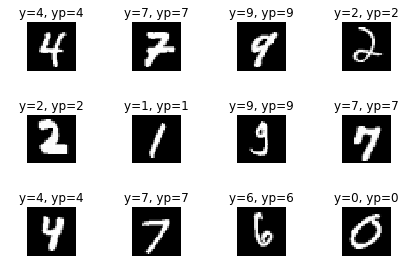

In [7]:
fig, axs = plt.subplots(mitem, nitem)
fi = 0
for i in range(mitem):
    for j in range(nitem):
        axs[i, j].imshow(x_batch[fi].reshape([28, 28]), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title('y={0}, yp={1}'.format(y_batch[fi], py_batch[fi]))
        fi += 1
fig.tight_layout()
plt.show()

In [8]:
all_variables = tf.trainable_variables()
all_variables

[<tf.Variable 'c1/kernel:0' shape=(5, 5, 1, 32) dtype=float32_ref>,
 <tf.Variable 'c1/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'c2/kernel:0' shape=(5, 5, 32, 64) dtype=float32_ref>,
 <tf.Variable 'c2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'd1/kernel:0' shape=(256, 100) dtype=float32_ref>,
 <tf.Variable 'd1/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'd2/kernel:0' shape=(100, 10) dtype=float32_ref>,
 <tf.Variable 'd2/bias:0' shape=(10,) dtype=float32_ref>]

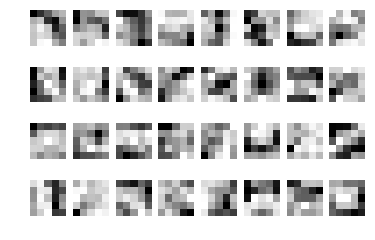

In [27]:
with tf.variable_scope('c1', reuse=tf.AUTO_REUSE):
    ks = sess.run(tf.get_variable('kernel', [5, 5, 1, 32]))
print('Filters from first layer')
fig, axs = plt.subplots(4, 8)
a = 0
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(ks[:, :, 0, a], cmap='gray')
        axs[i, j].axis('off')
        a += 1
plt.show()